Bank client data:
1) age (numeric)
2) job: type of
job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","selfemploy
ed","services","student","technician","unemployed","unknown")
3) marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced"
means divorced or widowed)
4) education: education of individual (categorical:
"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","u
nknown")
5) default: has credit in default? (categorical: "no","yes","unknown")
6) housing: has housing loan? (categorical: "no","yes","unknown")
7) loan: has personal loan? (categorical: "no","yes","unknown")
Related with the last contact of the current campaign:
8) contact: contact communication type (categorical: "cellular","telephone")
9) month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10) dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects
the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is
performed. Also, after the end of the call y is obviously known. Thus, this input should only be
included for benchmark purposes and should be discarded if the intention is to have a realistic
predictive model.
Other attributes:
12) campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact)
13) pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric; 999 means client was not previously contacted)
14) previous: number of contacts performed before this campaign and for this client (numeric)
15) poutcome: outcome of the previous marketing campaign (categorical:
"failure","nonexistent","success")
Social and economic context attributes
16) emp.var.rate: employment variation rate - quarterly indicator (numeric)
17) cons.price.idx: consumer price index - monthly indicator (numeric)
18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19) concavepoints_se: standard error for number of concave portions of the contour
20) euribor3m: euribor 3 month rate - daily indicator (numeric) 21) nr.employed: number of
employees - quarterly indicator (numeric)
Output variable (desired target):
22) y: has the client subscribed a term deposit? (binary: "yes","no")

# Importing basic Libraries for caterigoal analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

C:\Users\Dell\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [3]:
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\ML PROJECT\bank.csv",sep=";")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

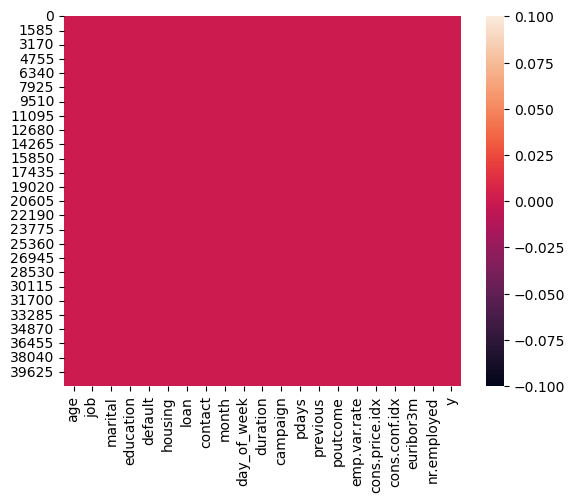

In [8]:
sns.heatmap(df.isnull())

NO NUll AS SUCH

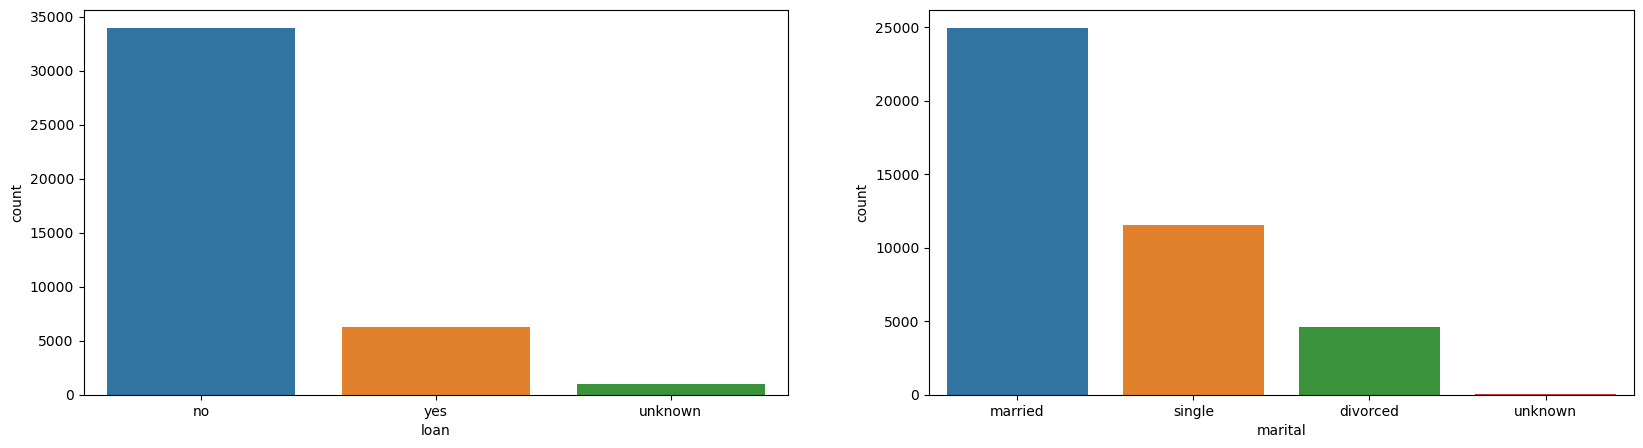

In [9]:
cat_cols = ['loan','marital']
i=0
while i < 2:
    fig = plt.figure(figsize=[20,5])   
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1  
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

In [10]:
#IN this data set people who take loan are very less
#Most of the clients are married


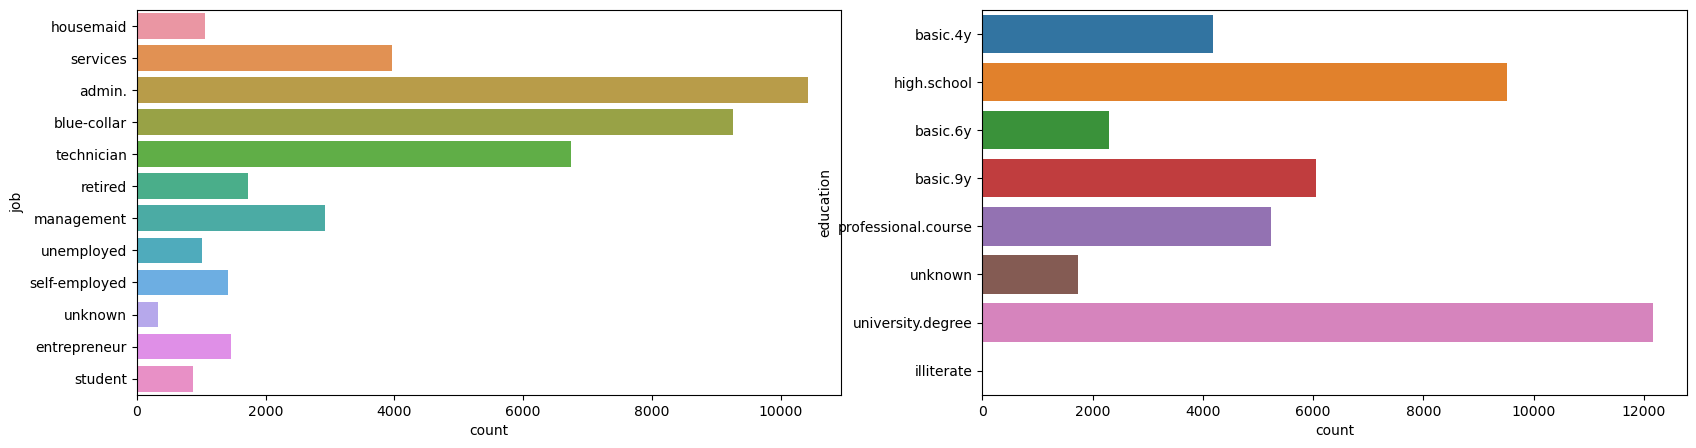

In [11]:
cat_cols = ['job','education']
i=0
while i < 2:
    fig = plt.figure(figsize=[20,5])   
    
    plt.subplot(1,2,1)
    sns.countplot(y=cat_cols[i], data=df)
    i += 1  
    
    plt.subplot(1,2,2)
    sns.countplot(y=cat_cols[i], data=df)
    i += 1
    
    plt.show()

In [12]:
# most of the people are admin
# education wise most of the people have uniovercity degrees

Count plot of target varialble

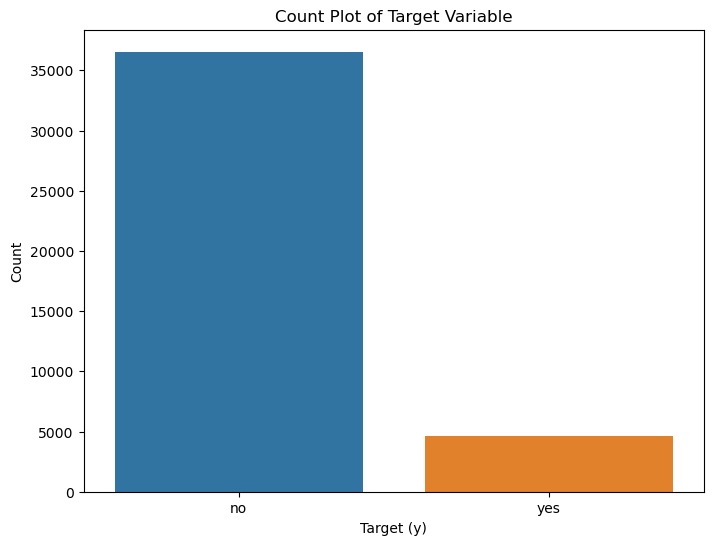

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Count Plot of Target Variable')
plt.xlabel('Target (y)')
plt.ylabel('Count')
plt.show()

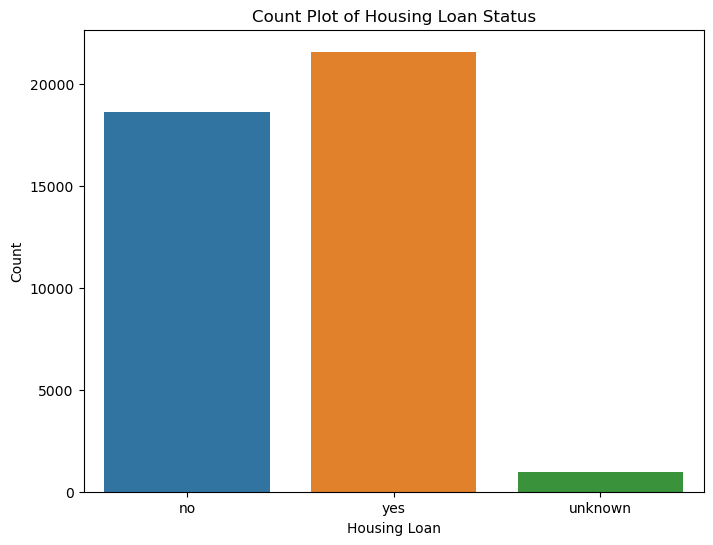

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='housing', data=df)
plt.title('Count Plot of Housing Loan Status')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()


people with housing loan are more

C:\Users\Dell\AppData\Local\Temp\ipykernel_26296\3404195055.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




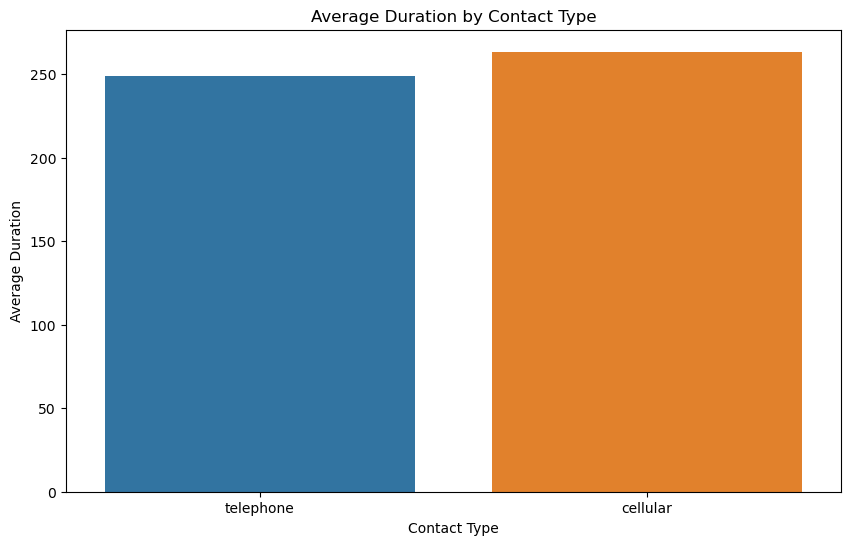

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='contact', y='duration', data=df, ci=None)
plt.title('Average Duration by Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Average Duration')
plt.show()

most of peolple chose cellular way to comunicate

C:\Users\Dell\AppData\Local\Temp\ipykernel_26296\2526366789.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




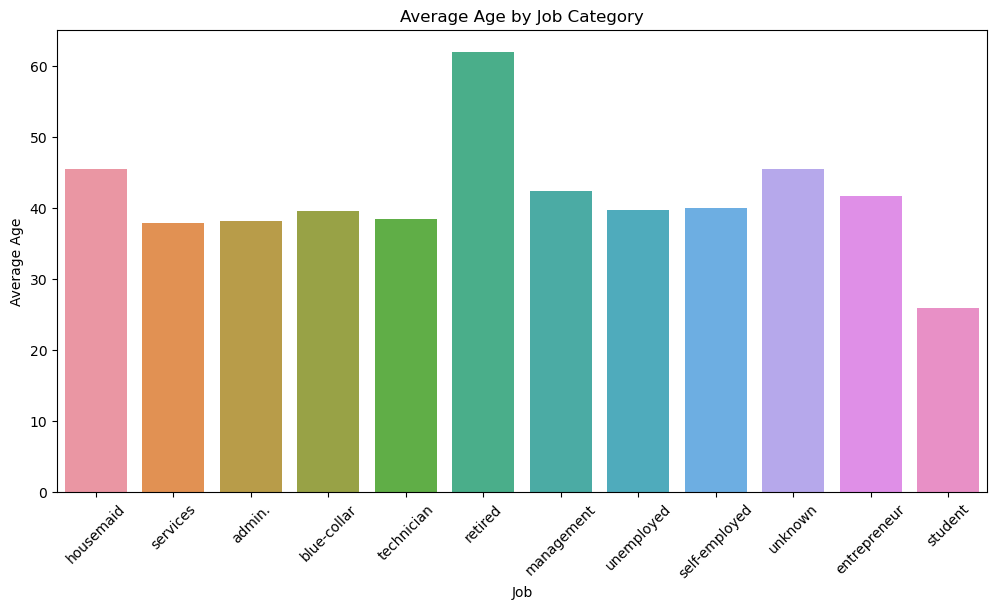

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='job', y='age', data=df, ci=None)
plt.title('Average Age by Job Category')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()

In [19]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column contains categorical data
        df[column] = label_encoder.fit_transform(df[column])

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [21]:
for column in df.columns:
    if (df[column] < 0).any():
        # If the column contains any negative values, convert the entire column to positive
        df[column] = np.abs(df[column])

In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,36.4,4.857,5191.0,0


In [23]:
from sklearn.model_selection import  train_test_split

In [24]:
df_train , df_test = train_test_split(df , test_size=0.2)

In [25]:
df_train_x = df_train.iloc[:,0:-1]
df_train_y = df_train.iloc[:, -1]
df_test_x = df_test.iloc[:,0:-1]
df_test_y = df_test.iloc[:, -1]

# Importing random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier


In [27]:
df_rf =RandomForestClassifier(criterion= 'entropy',class_weight='balanced',max_depth=10,min_samples_split=10,n_estimators=100)

In [28]:
df_rf.fit(df_train_x , df_train_y)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=10)

In [29]:
pred_rf = df_rf.predict(df_test_x)

In [30]:
pred_rf

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
df_rf.feature_importances_

array([0.02108555, 0.00942618, 0.00483722, 0.01106353, 0.00553297,
       0.00294535, 0.00260379, 0.01132688, 0.0312954 , 0.01006227,
       0.44560813, 0.01132801, 0.03593412, 0.00872466, 0.0231714 ,
       0.04604568, 0.04064596, 0.0386202 , 0.14209765, 0.09764503])

In [32]:
df_train_x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [33]:
#Cheacking feature importance

In [34]:
feature_imp = pd.DataFrame({"feature":df_train_x.columns,"imortance":df_rf.feature_importances_})

In [35]:
feature_imp

,feature,imortance
0,age,0.021086
1,job,0.009426
2,marital,0.004837
3,education,0.011064
4,default,0.005533
5,housing,0.002945
6,loan,0.002604
7,contact,0.011327
8,month,0.031295
9,day_of_week,0.010062


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
rf_tab = confusion_matrix(df_test_y ,pred_rf)
rf_tab

array([[6285,  969],
       [  88,  896]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(df_test_y ,pred_rf)*100

87.16921582908473

Random forest Accuracy score is 86%

# logestic reggreation

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
df_log = LogisticRegression()

In [42]:
df_log.fit(df_train_x , df_train_y)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [43]:
pred_log =df_log.predict(df_test_x)
pred_log

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
log_tab = confusion_matrix(df_test_y , pred_log)
log_tab

array([[7079,  175],
       [ 614,  370]], dtype=int64)

In [45]:
accuracy_score(df_test_y ,pred_log)*100

90.42243262927894

In [46]:
from sklearn.metrics import classification_report

In [47]:
classification_report(df_test_y ,pred_log)

'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95      7254\n           1       0.68      0.38      0.48       984\n\n    accuracy                           0.90      8238\n   macro avg       0.80      0.68      0.72      8238\nweighted avg       0.89      0.90      0.89      8238\n'

In [48]:
from sklearn.metrics import  precision_score

In [49]:
precision_score(df_test_y ,pred_log)

0.6788990825688074

In [50]:
from sklearn.metrics import recall_score

In [51]:
recall_score(df_test_y ,pred_log)

0.37601626016260165

In [52]:
from sklearn.metrics import  f1_score

In [53]:
f1_score(df_test_y ,pred_log)

0.4839764551994768

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [55]:
roc_auc_score(df_test_y ,pred_log)

0.6759458196318936

In [56]:
pred_prob = df_log.predict_proba(df_test_x)
pred_prob

array([[0.98376034, 0.01623966],
       [0.97418972, 0.02581028],
       [0.89825365, 0.10174635],
       ...,
       [0.9509943 , 0.0490057 ],
       [0.99283862, 0.00716138],
       [0.92818089, 0.07181911]])

In [57]:
pred_prob[: , 1]

array([0.01623966, 0.02581028, 0.10174635, ..., 0.0490057 , 0.00716138,
       0.07181911])

In [58]:
fpr ,tpr , ther = roc_curve(df_test_y ,pred_prob[: , 1])

Text(0.5, 0.5, 'AUROC SCORE IS 0.6774')

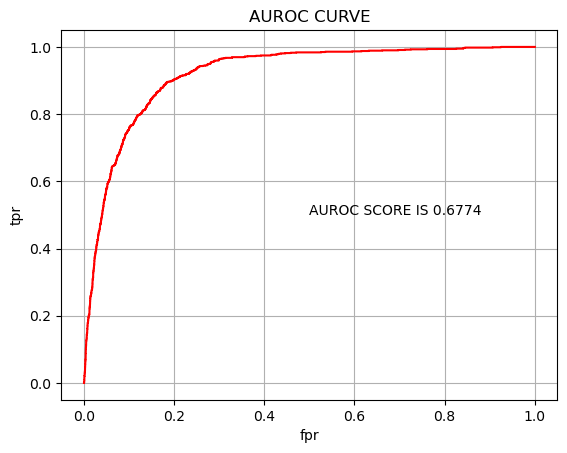

In [59]:
plt.plot(fpr, tpr , color='r')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("AUROC CURVE")
plt.grid()
plt.text(x=0.5 , y =0.5 , s="AUROC SCORE IS 0.6774")

In [60]:
#Logestic reggression might have nice accuracy score but other scores are not working properly
#recall,f1 - score and precision score are less so this model will not work

# importing naive_bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
df_nb = MultinomialNB()

In [63]:
df_nb.fit(df_train_x , df_train_y)

MultinomialNB()

In [64]:
pred_nb = df_nb.predict(df_test_x)
pred_nb

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
nb_tab = confusion_matrix(df_test_y , pred_nb)
nb_tab

array([[6281,  973],
       [ 316,  668]], dtype=int64)

In [66]:
accuracy_score(df_test_y , pred_nb)*100

84.3529983005584

# importing KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
df_knn = KNeighborsClassifier()

In [69]:
df_knn.fit(df_train_x , df_train_y)

KNeighborsClassifier()

In [70]:
pred_knn = df_knn.predict(df_test_x)
pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
knn_tab= confusion_matrix(df_test_y , pred_knn)
knn_tab

array([[6960,  294],
       [ 501,  483]], dtype=int64)

In [72]:
accuracy_score(df_test_y , pred_knn)*100

90.3495994173343

In [73]:

data = {
    'Model Name': ['logestic_regg', 'KNN', 'Naive_bayes','random_forest'],
    'Accuracy Score': [accuracy_score(df_test_y ,pred_log)*100,accuracy_score(df_test_y , pred_knn)*100,accuracy_score(df_test_y , pred_nb)*100,accuracy_score(df_test_y ,pred_rf)*100]
}

# Create DataFrame
result = pd.DataFrame(data)

In [74]:
result

,Model Name,Accuracy Score
0,logestic_regg,90.422433
1,KNN,90.349599
2,Naive_bayes,84.352998
3,random_forest,87.169216
